# Euler Scheme :

In [1]:
import numpy as np 

def euler(f, a, b, n, ya):
    """
    Calculate the solution of the initial-value problem from Euler method
    Parameters:
        f: Function f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Initial value
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    vx = np.zeros(n)
    vy = np.zeros((n,6))

    h = (b - a) / n
    x = a
    y = ya

    vx[0] = x
    vy[0] = y

    fxy = f(x, y)

    for i in range(0, n):
        
        x = a + (i + 1) * h
        y = (y+ (h * fxy)).reshape((1,6))

        fxy = f(x, y)
        
        vx[i] = x
        vy[i] = y
        

    return [vx, vy]



def rk4_system(f, a, b, n, ya):
    """
    Calculate the solution of systems of differential equations from
    Runge-Kutta (Order Four) method.
    Parameters:
        f: Array of functions f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Array of initial values
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    m = len(f)

    k = [np.zeros(m), np.zeros(m), np.zeros(m), np.zeros(m)]

    vx = np.zeros(n + 1)
    vy = np.zeros((m, n + 1))

    h = (b - a) / n

    x = a
    y = ya

    vx[0] = x
    vy[:, 0] = y

    for i in range(0, n):

        for j in range(0, m):
            k[0][j] = h * f[j](x, y)

        for j in range(0, m):
            k[1][j] = h * f[j](x + h / 2, y + k[0] / 2)

        for j in range(0, m):
            k[2][j] = h * f[j](x + h / 2, y + k[1] / 2)

        for j in range(0, m):
            k[3][j] = h * f[j](x + h, y + k[2])

        x = a + i * h
        y = y + (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6

        vx[i + 1] = x
        vy[:, i + 1] = y

    return [vx, vy]

In [2]:
def f(t, X):
    
    m1, m2, m3, k1, k2, k3, g = 60, 70, 80, 50, 100, 50, 9.81
    
    return np.array([X[0][3], X[0][4], X[0][5], 
                     (1/m1)*(m1*g + (k2*(X[0][1]-X[0][0])) - (k1*X[0][0])),
                     (1/m2)*(m2*g + (k3*(X[0][2]-X[0][1])) + (k2*(X[0][0] - X[0][1]))),
                     (1/m3)*(m3*g + (k3*(X[0][1]-X[0][2])))]).reshape(1,6)


t, X = euler(f, 0, 50, 100000, np.array([0, 0, 0, 0, 0, 0]).reshape(1,6))

In [3]:
X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.90500000e-03,
        4.90500000e-03, 4.90500000e-03],
       [2.45250000e-06, 2.45250000e-06, 2.45250000e-06, 9.81000000e-03,
        9.81000000e-03, 9.81000000e-03],
       [7.35750000e-06, 7.35750000e-06, 7.35750000e-06, 1.47149990e-02,
        1.47150000e-02, 1.47150000e-02],
       ...,
       [3.02904641e+01, 3.97665170e+01, 4.64814613e+01, 1.27966291e+01,
        2.01088265e+01, 2.92610781e+01],
       [3.02968624e+01, 3.97765714e+01, 4.64960919e+01, 1.27968098e+01,
        2.01093611e+01, 2.92638847e+01],
       [3.03032609e+01, 3.97866261e+01, 4.65107238e+01, 1.27969908e+01,
        2.01098947e+01, 2.92666899e+01]])

# graph of $x_1 , x_2, x_3$ as a function of time for euler scheme  :

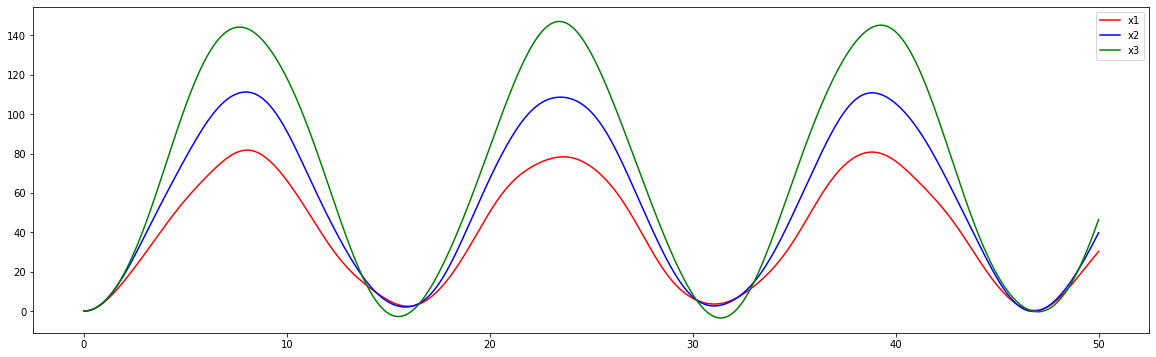

In [4]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (20, 6))

plt.plot(t, X[:, 0], 'r', label='x1')
plt.plot(t, X[:, 1], 'b', label='x2')
plt.plot(t, X[:, 2], 'g', label='x3')

plt.legend()

# Runge Kutta scheme : 

In [5]:
def rk4_system(f, a, b, n, ya):
    """
    Calculate the solution of systems of differential equations from
    Runge-Kutta (Order Four) method.
    Parameters:
        f: Array of functions f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Array of initial values
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    m = len(f)

    k = [np.zeros(m), np.zeros(m), np.zeros(m), np.zeros(m)]

    vx = np.zeros(n + 1)
    vy = np.zeros((m, n + 1))

    h = (b - a) / n

    x = a
    y = ya

    vx[0] = x
    vy[:, 0] = y

    for i in range(0, n):

        for j in range(0, m):
            k[0][j] = h * f[j](x, y)

        for j in range(0, m):
            k[1][j] = h * f[j](x + h / 2, y + k[0] / 2)

        for j in range(0, m):
            k[2][j] = h * f[j](x + h / 2, y + k[1] / 2)

        for j in range(0, m):
            k[3][j] = h * f[j](x + h, y + k[2])

        x = a + i * h
        y = y + (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6

        vx[i + 1] = x
        vy[:, i + 1] = y

    return [vx, vy]

In [6]:
F = [lambda t, X : X[0][3],
     lambda t, X : X[0][4],
     lambda t, X : X[0][5],
     lambda t, X :(1/60)*(60*9.81 + (100*(X[0][1]-X[0][0])) - 50*X[0][0]),
     lambda t, X :(1/70)*(70*9.81 + (50*(X[0][2]-X[0][1])) + (100*(X[0][0] - X[0][1]))),
     lambda t, X :(1/80)*(80*9.81 + (50*(X[0][1]-X[0][2])))]


t_, X_ = rk4_system(F, 0, 50, 100000, np.array([0, 0, 0, 0, 0, 0]).reshape(1,6))

In [7]:
X_

array([[0.00000000e+00, 1.22624998e-06, 4.90499966e-06, ...,
        3.02950444e+01, 3.03014519e+01, 3.03078595e+01],
       [0.00000000e+00, 1.22625000e-06, 4.90500000e-06, ...,
        3.97800701e+01, 3.97901004e+01, 3.98001311e+01],
       [0.00000000e+00, 1.22625000e-06, 4.90500000e-06, ...,
        4.65514273e+01, 4.65660229e+01, 4.65806198e+01],
       [0.00000000e+00, 4.90499983e-03, 9.80999864e-03, ...,
        1.28148696e+01, 1.28150560e+01, 1.28152428e+01],
       [0.00000000e+00, 4.90500000e-03, 9.81000000e-03, ...,
        2.00604562e+01, 2.00610041e+01, 2.00615510e+01],
       [0.00000000e+00, 4.90500000e-03, 9.81000000e-03, ...,
        2.91896788e+01, 2.91924670e+01, 2.91952538e+01]])

# graph of $x_1 , x_2, x_3$ as a function of time for runge kutta  scheme  :

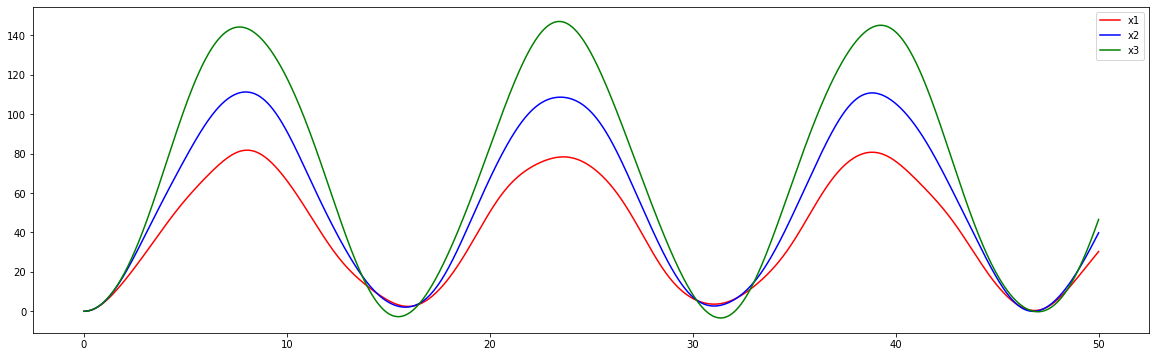

In [8]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (20, 6))

plt.plot(t_, X_[0, :], 'r', label='x1')
plt.plot(t_, X_[1, :], 'b', label='x2')
plt.plot(t_, X_[2, :], 'g', label='x3')

plt.legend()

# other plots :

$v_i(t)$ vs $t$ for the euler scheme : 

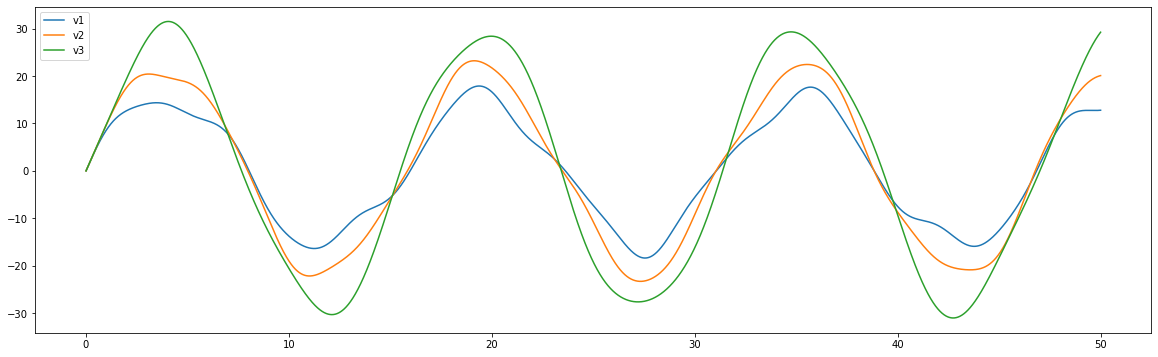

In [9]:
plt.figure(figsize = (20, 6))

plt.plot(t, X[:, 3], label='v1')
plt.plot(t, X[:, 4], label='v2')
plt.plot(t, X[:, 5], label='v3')

plt.legend()

$v_i(t)$ vs $t$ for the runge kutta scheme : 

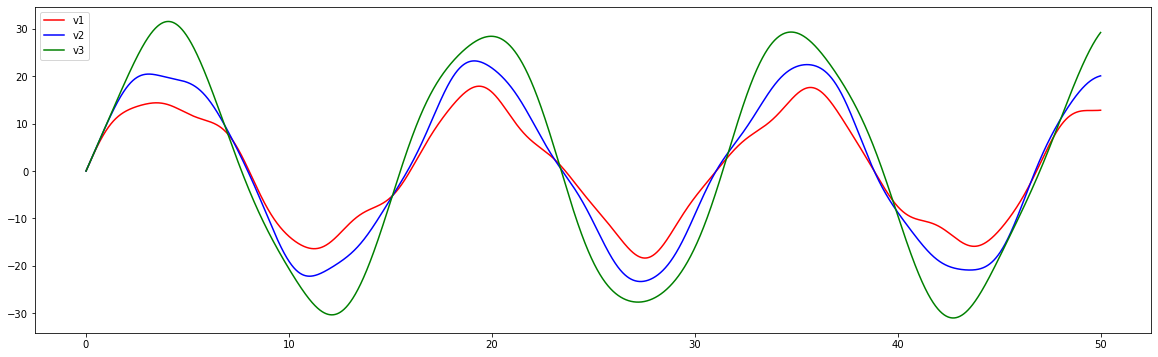

In [10]:
plt.figure(figsize = (20, 6))

plt.plot(t_, X_[3, :], 'r', label='v1')
plt.plot(t_, X_[4, :], 'b', label='v2')
plt.plot(t_, X_[5, :], 'g', label='v3')

plt.legend()

combined plots for $x_i(t)$ and $v_i(t)$ for the runge kutta iterations :

'solid line' : $x_i$
'dashed line' :  $v_i$

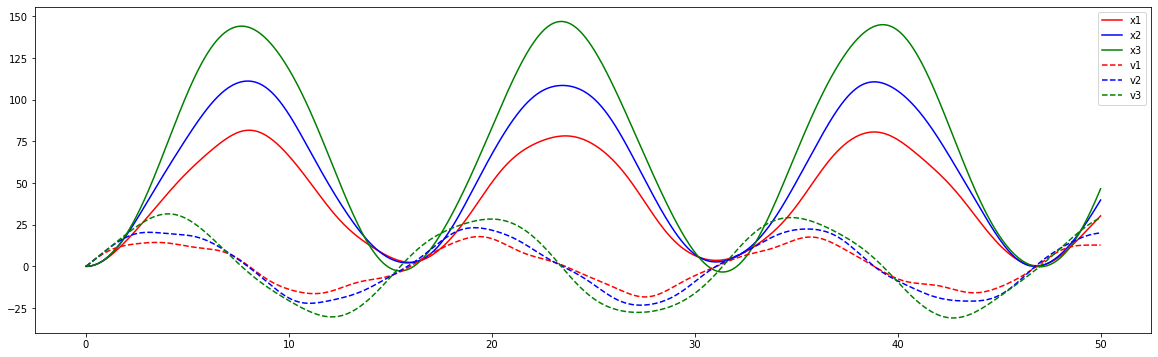

In [11]:
plt.figure(figsize = (20, 6))

plt.plot(t_, X_[0, :], 'r', label='x1')
plt.plot(t_, X_[1, :], 'b', label='x2')
plt.plot(t_, X_[2, :], 'g', label='x3')


plt.plot(t_, X_[3, :], 'r--', label='v1')
plt.plot(t_, X_[4, :], 'b--', label='v2')
plt.plot(t_, X_[5, :], 'g--', label='v3')

plt.legend()

combined plots for $x_i(t)$ and $v_i(t)$ for the euler iterations :

'solid line' : $x_i$
'dashed line' :  $v_i$

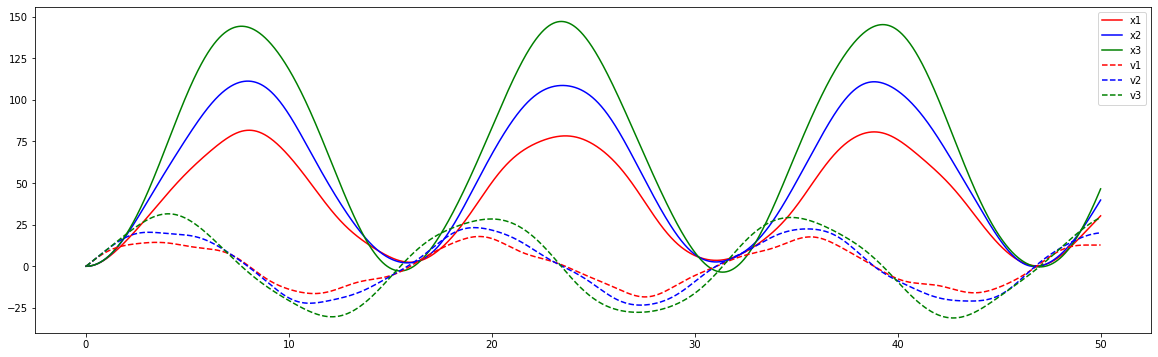

In [12]:
plt.figure(figsize = (20, 6))


plt.plot(t, X[:, 0], 'r', label='x1')
plt.plot(t, X[:, 1], 'b', label='x2')
plt.plot(t, X[:, 2], 'g', label='x3')

plt.plot(t, X[:, 3], 'r--', label='v1')
plt.plot(t, X[:, 4], 'b--', label='v2')
plt.plot(t, X[:, 5], 'g--', label='v3')


plt.legend()